In [1]:
import os

In [2]:
print casa['build']['version']
tasklist()

5.5.0-149  
Available tasks, organized by category (experimental tasks in parenthesis ()
  deprecated tasks in curly brackets {}).


Import/export       Information         Editing             Manipulation      
------------------  ------------------  ------------------  ------------------
exportasdm          asdmsummary         fixplanets          concat            
exportfits          imhead              fixvis              conjugatevis      
exportuvfits        imreframe           flagcmd             cvel              
importasap          imstat              flagdata            fixvis            
importasdm          imval               flagmanager         hanningsmooth     
importatca          listcal             msview              imhead            
importfits          listfits            plotms              mstransform       
importfitsidi       listhistory                             oldstatwt         
importmiriad        listobs                                 partition        

Identify bad antennas and flag those channels that have persistent, bad outliers that it could skew the calibration results.    

Use calibrators for inspection and flagging.
The data for the initial investigation is uncalibrated, but for point-like sources expect values that are consistent across baselines and vary only slightly across channels.

In [3]:
msfile='ngc3621.ms'
if not os.path.exists(msfile):
    raise IOError('{} file does not exist.'.format(msfile))
else:
    print(os.listdir(msfile))

['table.f6', 'table.f3_TSM0', 'table.f1', 'table.f5_TSM0', 'SPECTRAL_WINDOW', 'DATA_DESCRIPTION', 'FLAG_CMD', 'table.f7', 'table.f5', 'HISTORY', 'table.f2_TSM0', 'table.f6_TSM0', 'table.dat', 'table.lock', 'POINTING', 'table.f1_TSM0', 'STATE', 'SOURCE', 'FEED', 'ANTENNA', 'table.info', 'table.f2', 'table.f4', 'POLARIZATION', 'FIELD', 'table.f3', 'table.f0_TSM0', 'table.f0', 'table.f7_TSM0', 'PROCESSOR', 'OBSERVATION']


For the initial flagging the best approach is usually to first make several passes through the data of the observed calibrator sources, using various plotting and listing tools, to identify the bad data. Once you have identified some sections of bad data, flag them out explicitly using flagdata.

## Inspecting the Data

In [4]:
listobs(vis=msfile)

           MeasurementSet Name:  /home/jupyter/MeerKAT-Cookbook/casa/ngc3621.ms      MS Version 2
   Observer: Sharmila     Project: 20170408-0011  
Observation: MeerKAT
Data records: 15687       Total elapsed time = 3274.61 seconds
   Observed from   08-Apr-2017/15:00:22.0   to   08-Apr-2017/15:54:56.6 (UTC)

   ObservationID = 0         ArrayID = 0
  Date        Timerange (UTC)          Scan  FldId FieldName             nRows     SpwIds   Average Interval(s)    ScanIntent
  08-Apr-2017/15:00:22.0 - 15:10:17.7     1      0 0408-65                   3129  [0]  [4] [CALIBRATE_BANDPASS,CALIBRATE_FLUX]
              15:12:53.6 - 15:22:53.4     2      1 NGC3621                   3150  [0]  [4] [TARGET]
              15:23:09.4 - 15:25:05.3     3      2 1117-248                   609  [0]  [4] [CALIBRATE_AMPLI,CALIBRATE_PHASE]
              15:25:21.3 - 15:30:21.2     4      1 NGC3621                   1575  [0]  [4] [TARGET]
              15:30:37.2 - 15:32:33.1     5      2 1117-248      

True

Show log 2019-08-22 13:59:46	INFO	listobs::::	
 2019-08-22 13:59:46	INFO	listobs::::+	##########################################
 2019-08-22 13:59:46	INFO	listobs::::+	##### Begin Task: listobs #####
 2019-08-22 13:59:46	INFO	listobs::::	listobs(vis="ngc3621.ms",selectdata=True,spw="",field="",antenna="",
 2019-08-22 13:59:46	INFO	listobs::::+ uvrange="",timerange="",correlation="",scan="",intent="",
 2019-08-22 13:59:46	INFO	listobs::::+ feed="",array="",observation="",verbose=True,listfile="casapy_temp.txt",
 2019-08-22 13:59:46	INFO	listobs::::+ listunfl=False,cachesize=50,overwrite=True)
 2019-08-22 13:59:46	INFO	listobs::ms::summary	Writing output to file: casapy_temp.txt
 2019-08-22 13:59:46	INFO	listobs::MSMetaData::_computeScanAndSubScanProperties Computing scan and subscan properties...
 2019-08-22 13:59:46	INFO	listobs::::	##### End Task: listobs #####
 2019-08-22 13:59:46	INFO	listobs::::+	##########################################

Compare the output with the `katdal` header display

Useful information: targets (fields) observed, and in which spectral windows (Spw). Whether the observation contains a single setup or various spectral resolutions: number channels, total bandwidth, center frequency, correlator product per spectral window. As well as, number of antennas and which antennas was used.

Good advice is to start with a bandpass (primary) calibrator for inspection. Then confirm bad antenna and channel behaviour using the phase (secondary) calibrators.

Remember: The bandpass (primary) calibrator is a point source that is very stable and well known.

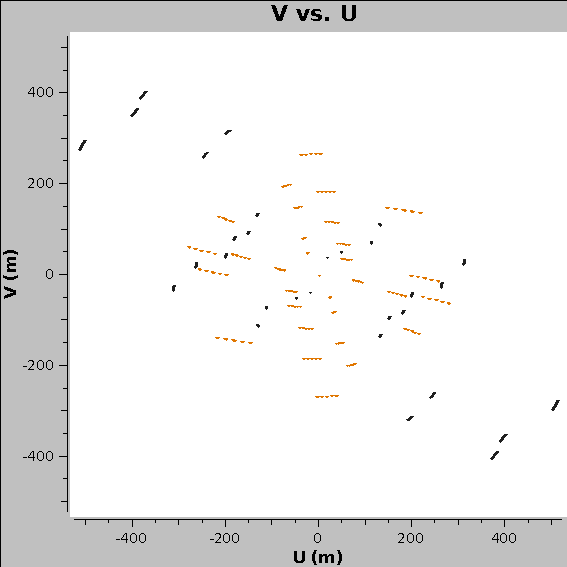

True

Show log 2019-08-22 13:59:51	INFO	plotms::::	
 2019-08-22 13:59:51	INFO	plotms::::+	##########################################
 2019-08-22 13:59:51	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 13:59:51	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 13:59:51	INFO	plotms::::+ plotindex=0,xaxis="u",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 13:59:51	INFO	plotms::::+ yaxis="v",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 13:59:51	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="0",timerange="",uvrange="",
 2019-08-22 13:59:51	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 13:59:51	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 13:59:51	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 13:59:51	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 13:59:51	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 13:59:51	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 13:59:51	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 13:59:51	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 13:59:51	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 13:59:51	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 13:59:51	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 13:59:51	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 13:59:51	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 13:59:51	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 13:59:51	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 13:59:51	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 13:59:53	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 13:59:53	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	START Current memory usage: 2293.27 kilobytes.
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 13:59:53	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Caching for the new plot: V(31) vs. U(30)...
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 13:59:53	INFO	PlotMS::load_cache	Data selection will yield a total of 11226600 plottable points (flagged and unflagged).
 2019-08-22 1

In [5]:
plotms(vis=msfile,
       xaxis='u',
       yaxis='v',
       field='0408-65,1117-248',
       spw='0',
       ydatacolumn='',
       coloraxis='field',
       correlation='')

In [6]:
targets = '0408-65,1117-248'

Number of points being plotted: 6


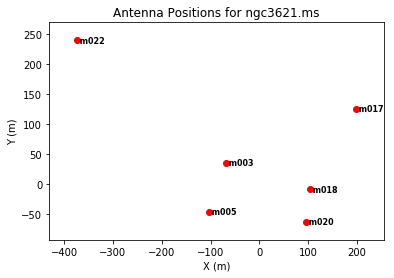

Show log 2019-08-22 14:00:07	INFO	plotants::::	
 2019-08-22 14:00:07	INFO	plotants::::+	##########################################
 2019-08-22 14:00:07	INFO	plotants::::+	##### Begin Task: plotants #####
 2019-08-22 14:00:07	INFO	plotants::::	plotants(vis="ngc3621.ms",figfile="",antindex=False,logpos=False,exclude="",
 2019-08-22 14:00:07	INFO	plotants::::+ checkbaselines=False,title="",showgui=True)
 2019-08-22 14:00:07	INFO	msmetadata_cmpt.cc::open	Performing internal consistency checks on ngc3621.ms...
 2019-08-22 14:00:07	INFO	plotants::::	Number of points being plotted: 6
 2019-08-22 14:00:07	INFO	plotants::::	##### End Task: plotants #####
 2019-08-22 14:00:07	INFO	plotants::::+	##########################################

In [8]:
# antenna positions
plotants(vis=msfile)

### Applying standard flags
Automated flagging for shadowing, elevations below 15 degrees and extreme outliers:

In [9]:
flagdata(vis=msfile, mode='shadow');
# if a Leap second warning is raised, simply run the command again to get rid of the warning

Show log 2019-08-22 14:00:12	INFO	flagdata::::	
 2019-08-22 14:00:12	INFO	flagdata::::+	##########################################
 2019-08-22 14:00:12	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-08-22 14:00:12	INFO	flagdata::::	flagdata(vis="ngc3621.ms",mode="shadow",autocorr=False,inpfile="",reason="any",
 2019-08-22 14:00:12	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-08-22 14:00:12	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-08-22 14:00:12	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-08-22 14:00:12	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-08-22 14:00:12	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-08-22 14:00:12	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-08-22 14:00:12	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-08-22 14:00:12	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-08-22 14:00:12	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-08-22 14:00:12	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-08-22 14:00:12	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-08-22 14:00:12	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-08-22 14:00:12	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-08-22 14:00:12	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-08-22 14:00:12	INFO	flagdata::::+ writeflags=True)
 2019-08-22 14:00:12	INFO	flagdata::::	Backup original flags before applying new flags
 2019-08-22 14:00:12	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:12	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_1
 2019-08-22 14:00:12	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:12	INFO	flagdata::::	Shadow mode is active
 2019-08-22 14:00:12	INFO	flagdata::::	Initializing the agents
 2019-08-22 14:00:12	INFO	Shadow::setAgentParameters tolerance is 0 meters 
 2019-08-22 14:00:12	INFO	Shadow::setAgentParameters addantenna is 
 2019-08-22 14:00:12	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-08-22 14:00:12	INFO	flagdata::::	Running the agentflagger tool
 2019-08-22 14:00:12	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:12	INFO	FlagMSHandler::	Chunk = 1 [progress: 19%], Observation = 0, Array = 0, Scan = 1, Field = 0 (0408-65), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3129
 2019-08-22 14:00:12	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:12	INFO	FlagMSHandler::	Chunk = 2 [progress: 40%], Observation = 0, Array = 0, Scan = 2, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3150
 2019-08-22 14:00:12	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:12	INFO	FlagMSHandler::	Chunk = 3 [progress: 43%], Observation = 0, Array = 0, Scan = 3, Field = 2 (1117-248), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 609
 2019-08-22 14:00:12	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:12	INFO	FlagMSHandler::	Chunk = 4 [progress: 53%], Observation = 0, Array = 0, Scan = 4, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 1575
 2019-08-22

In [10]:
flagdata(vis=msfile, mode='elevation', lowerlimit=15., upperlimit=90., action='apply');

Show log 2019-08-22 14:00:13	INFO	flagdata::::	
 2019-08-22 14:00:13	INFO	flagdata::::+	##########################################
 2019-08-22 14:00:13	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-08-22 14:00:13	INFO	flagdata::::	flagdata(vis="ngc3621.ms",mode="elevation",autocorr=False,inpfile="",reason="any",
 2019-08-22 14:00:13	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-08-22 14:00:13	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-08-22 14:00:13	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-08-22 14:00:13	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-08-22 14:00:13	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-08-22 14:00:13	INFO	flagdata::::+ lowerlimit=15.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-08-22 14:00:13	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-08-22 14:00:13	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-08-22 14:00:13	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-08-22 14:00:13	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-08-22 14:00:13	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-08-22 14:00:13	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-08-22 14:00:13	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-08-22 14:00:13	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-08-22 14:00:13	INFO	flagdata::::+ writeflags=True)
 2019-08-22 14:00:13	INFO	flagdata::::	Backup original flags before applying new flags
 2019-08-22 14:00:13	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:13	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_2
 2019-08-22 14:00:13	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:13	INFO	flagdata::::	Elevation mode is active
 2019-08-22 14:00:13	INFO	flagdata::::	Initializing the agents
 2019-08-22 14:00:13	INFO	Elevation::setAgentParameters lowerlimit is 15
 2019-08-22 14:00:13	INFO	Elevation::setAgentParameters upperlimit is 90
 2019-08-22 14:00:13	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-08-22 14:00:13	INFO	flagdata::::	Running the agentflagger tool
 2019-08-22 14:00:13	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:13	INFO	FlagMSHandler::	Chunk = 1 [progress: 19%], Observation = 0, Array = 0, Scan = 1, Field = 0 (0408-65), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3129
 2019-08-22 14:00:13	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:13	INFO	FlagMSHandler::	Chunk = 2 [progress: 40%], Observation = 0, Array = 0, Scan = 2, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3150
 2019-08-22 14:00:13	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:13	INFO	FlagMSHandler::	Chunk = 3 [progress: 43%], Observation = 0, Array = 0, Scan = 3, Field = 2 (1117-248), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 609
 2019-08-22 14:00:13	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:13	INFO	FlagMSHandler::	Chunk = 4 [progress: 53%], Observation = 0, Array = 0, Scan = 4, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 1575
 2

In [11]:
flagdata(vis=msfile, mode='clip', clipminmax = [1e-5, 1000.0]);

Show log 2019-08-22 14:00:14	INFO	flagdata::::	
 2019-08-22 14:00:14	INFO	flagdata::::+	##########################################
 2019-08-22 14:00:14	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-08-22 14:00:14	INFO	flagdata::::	flagdata(vis="ngc3621.ms",mode="clip",autocorr=False,inpfile="",reason="any",
 2019-08-22 14:00:14	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-08-22 14:00:14	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-08-22 14:00:14	INFO	flagdata::::+ observation="",feed="",clipminmax=[1e-05, 1000.0],datacolumn="DATA",clipoutside=True,
 2019-08-22 14:00:14	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-08-22 14:00:14	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-08-22 14:00:14	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-08-22 14:00:14	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-08-22 14:00:14	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-08-22 14:00:14	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-08-22 14:00:14	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-08-22 14:00:14	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-08-22 14:00:14	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-08-22 14:00:14	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-08-22 14:00:14	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-08-22 14:00:14	INFO	flagdata::::+ writeflags=True)
 2019-08-22 14:00:14	INFO	flagdata::::	Backup original flags before applying new flags
 2019-08-22 14:00:14	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:14	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_3
 2019-08-22 14:00:14	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:14	INFO	flagdata::::	Clip mode is active
 2019-08-22 14:00:14	INFO	flagdata::::	Initializing the agents
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters data column is DATA
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters Visibility expression is ABS XX,YY
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters clipzeros is 0
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters clipoutside is 1
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters clipmin is 1e-05
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters clipmax is 1000
 2019-08-22 14:00:14	INFO	Clip::setAgentParameters Clipping outside [1e-05,1000], plus NaNs
 2019-08-22 14:00:14	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-08-22 14:00:14	INFO	flagdata::::	Running the agentflagger tool
 2019-08-22 14:00:14	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:14	INFO	FlagMSHandler::	Chunk = 1 [progress: 19%], Observation = 0, Array = 0, Scan = 1, Field = 0 (0408-65), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3129
 2019-08-22 14:00:15	INFO	Clip::chunkSummary	=> Data flagged so far 16.7019%
 2019-08-22 14:00:15	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:15	INFO	FlagMSHandler::	Chunk = 2 [progress: 40%], Observation = 0, Array = 0, Scan = 2, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3150
 2019-08-22 14:00:15	INFO	Clip::chunkSummary	=> Data flagged so far 16.7353%
 2019-08-22 14:00:15	INFO	FlagMSHandler::	--------------------------------------------------------------------

In [12]:
# only for continuum sources (imaging)
flagdata(vis=msfile, mode='clip', clipzeros=True, flagbackup=False);

Show log 2019-08-22 14:00:17	INFO	flagdata::::	
 2019-08-22 14:00:17	INFO	flagdata::::+	##########################################
 2019-08-22 14:00:17	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-08-22 14:00:17	INFO	flagdata::::	flagdata(vis="ngc3621.ms",mode="clip",autocorr=False,inpfile="",reason="any",
 2019-08-22 14:00:17	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="",
 2019-08-22 14:00:17	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-08-22 14:00:17	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-08-22 14:00:17	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=True,
 2019-08-22 14:00:17	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-08-22 14:00:17	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-08-22 14:00:17	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-08-22 14:00:17	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-08-22 14:00:17	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-08-22 14:00:17	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-08-22 14:00:17	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-08-22 14:00:17	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-08-22 14:00:17	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-08-22 14:00:17	INFO	flagdata::::+ flagbackup=False,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-08-22 14:00:17	INFO	flagdata::::+ writeflags=True)
 2019-08-22 14:00:17	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:00:17	INFO	flagdata::::	Clip mode is active
 2019-08-22 14:00:17	INFO	flagdata::::	Initializing the agents
 2019-08-22 14:00:17	INFO	Clip::setAgentParameters data column is DATA
 2019-08-22 14:00:17	INFO	Clip::setAgentParameters Visibility expression is ABS XX,YY
 2019-08-22 14:00:17	INFO	Clip::setAgentParameters clipzeros is 1
 2019-08-22 14:00:17	INFO	Clip::setAgentParameters clipoutside is 1
 2019-08-22 14:00:17	INFO	Clip::setAgentParameters clipminmax range not provided
 2019-08-22 14:00:17	INFO	Clip::setAgentParameters Clipping range not provided, clipping NaNs and zeros
 2019-08-22 14:00:17	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-08-22 14:00:17	INFO	flagdata::::	Running the agentflagger tool
 2019-08-22 14:00:17	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:17	INFO	FlagMSHandler::	Chunk = 1 [progress: 19%], Observation = 0, Array = 0, Scan = 1, Field = 0 (0408-65), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3129
 2019-08-22 14:00:17	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:17	INFO	FlagMSHandler::	Chunk = 2 [progress: 40%], Observation = 0, Array = 0, Scan = 2, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 3150
 2019-08-22 14:00:18	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:18	INFO	FlagMSHandler::	Chunk = 3 [progress: 43%], Observation = 0, Array = 0, Scan = 3, Field = 2 (1117-248), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 609
 2019-08-22 14:00:18	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:00:18	INFO	FlagMSHandler::	Chunk = 4 [progress: 53%], Observation = 0, Array = 0, Scan = 4, Field = 1 (NGC3621), Spw = 0, C

If the edges of the band was not excluded in the measurement set conversion, they can be removed manually
```
flagdata(vis=msfile, mode='manual', spw='0:600MHz~900MHZ', action='apply');
flagdata(vis=msfile, mode='manual', spw='0:1670MHz~2000MHZ', action='apply');
```

### Phase
Phase can vary both with time and channel -- since it is hard to determine the phase stability by looking at all channels and over time simultaneously, consider each separately

**"Slice" in time -- look at one scan, but all channels**
* Look at phase as a function of frequency on a per-baseline basis -- using a strong calibrator
* Pick an observation from listobs output

When using CASA from the command line, better visualisation may be available than from the notebook. So once you are comfortable with the processing introduced here, use `plotms` from CASA in a terminal
```
plotms(vis=msfile, xaxis='channel', yaxis='phase', correlation='XX,YY', scan='1', field='0408-65', iteraxis='baseline', coloraxis='corr', plotrange=[0,0,-180,180])
```

Stepping through the baselines -- identify channels with persistent, very strong RFI. Especially if the phases for both XX and YY show consistent plots with data points close together. (Note: the pre-flagged data using h5toms is considerably cleaner from large spikes than the unflagged data, but some high points in suspect channels did survive.)

If you have multiple scans in the observation, page through all the scans of this source and identify other persistent, strong RFI. Continue to do this until you have inspected a good sample of your data.

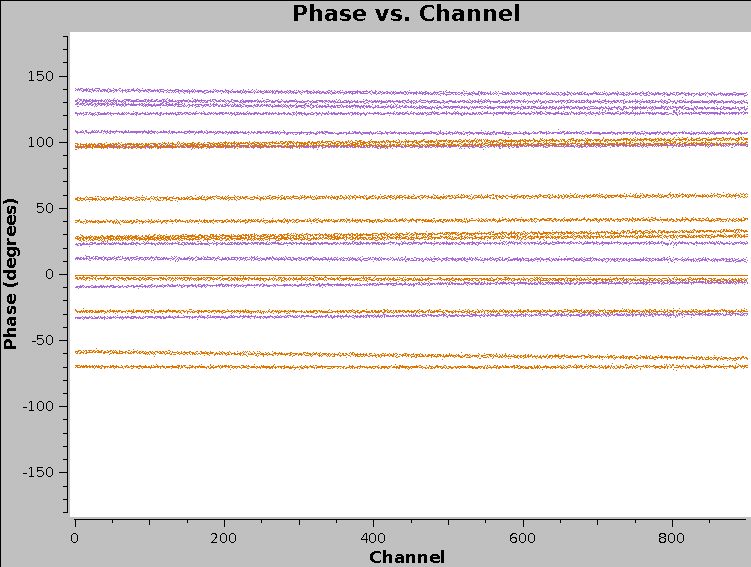

True

Show log 2019-08-22 14:01:24	INFO	plotms::::	
 2019-08-22 14:01:24	INFO	plotms::::+	##########################################
 2019-08-22 14:01:24	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:01:24	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:01:24	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:01:24	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:01:24	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:01:24	INFO	plotms::::+ antenna="!m022",scan="1",correlation="XX,YY",array="",observation="",
 2019-08-22 14:01:24	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:01:24	INFO	plotms::::+ avgtime="300",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:01:24	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:01:24	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:01:24	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:01:24	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:01:24	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:01:24	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:01:24	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:01:24	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:01:24	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:01:24	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:01:24	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:01:24	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:01:24	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:01:24	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	START Current memory usage: 5667.28 kilobytes.
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ Time: 300 seconds. Scan: false; Field: false
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:01:24	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Channel(5)...
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:01:24	INFO	PlotMS::load_cache	Data selection will yield a total of 57600 plottable points (flagged and unflagged).
 2019-08-22 14:01:24	INFO	PlotMS::load_

In [15]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       antenna='!m022',
       averagedata=True,
       avgtime='300',
       correlation='XX,YY',
       scan='1',
       field=targets,
       coloraxis='corr',
       plotrange=[0,0,-180,180])

**"Slice in frequency" -- look at only one channel but at all times**
Check phase stability against time
```
plotms(vis=msfile, xaxis='time', yaxis='phase', correlation='XX,YY', spw='*:2550', field='0408-65', iteraxis='baseline', coloraxis='corr', plotrange=[0,0,-180,180])
```

Where `spw='*:2550'` plots the data for all spectral windows (just one = 0) and only for a channel in the center of the band.
Select a number of channels through the range and view display.

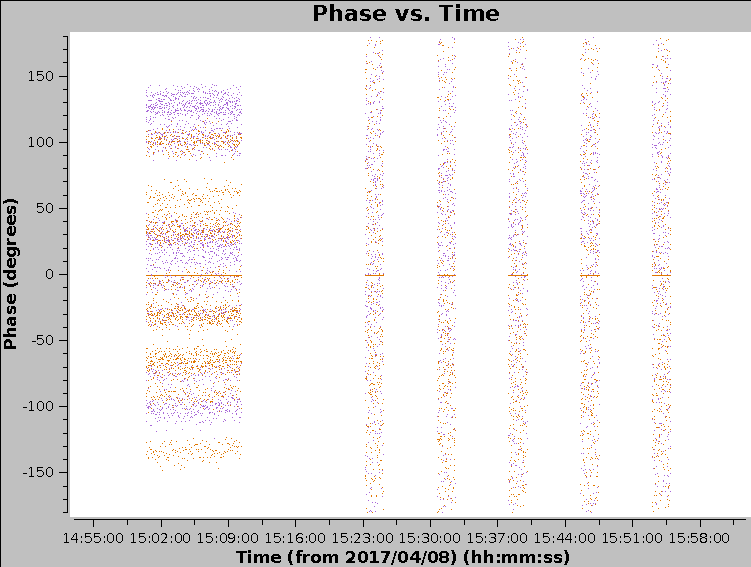

True

Show log 2019-08-22 14:02:08	INFO	plotms::::	
 2019-08-22 14:02:08	INFO	plotms::::+	##########################################
 2019-08-22 14:02:08	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:02:08	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:02:08	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:02:08	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:02:08	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="*:2550",timerange="",uvrange="",
 2019-08-22 14:02:08	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-08-22 14:02:08	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:02:08	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:02:08	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:02:08	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:02:08	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:02:08	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:02:08	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:02:08	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:02:08	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:02:08	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:02:08	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:02:08	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:02:08	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:02:08	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:02:08	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:02:08	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	START Current memory usage: 5713.31 kilobytes.
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:02:08	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Time(2)...
 2019-08-22 14:02:08	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:02:09	INFO	PlotMS::load_cache	Data selection will yield a total of 12474 plottable points (flagged and unflagged).
 2019-08-22 14:02:09	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.000163944 GB of memory (13.1429 bytes/point).
 2019-08-22 14:02:09	INFO	PlotMS::load_cache+	This is 0.00100499% o

In [18]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='phase',
       correlation='XX,YY',
       spw='*:2550',
       field=targets,
       coloraxis='corr',
       plotrange=[0,0,-180,180])

### Amplitude
Thus plot amplitude for all baseline together.   
Bandpass calibrator must have fairly stable amplitude over time.

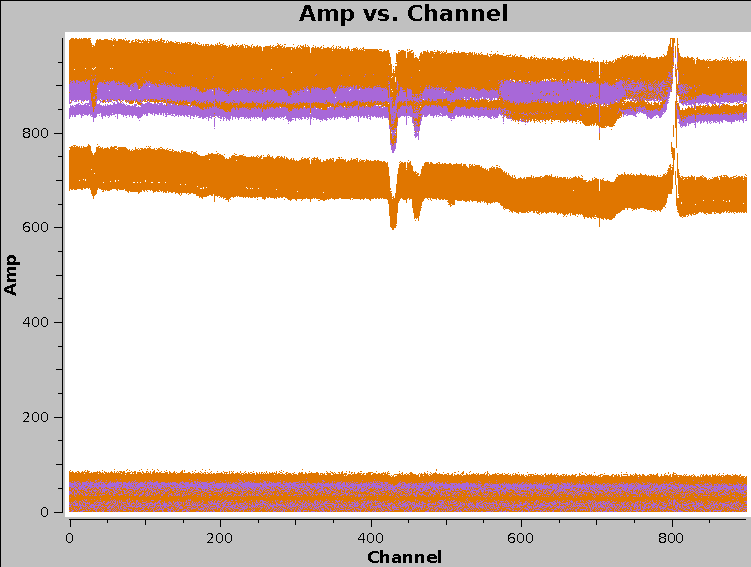

True

Show log 2019-08-22 14:02:22	INFO	plotms::::	
 2019-08-22 14:02:22	INFO	plotms::::+	##########################################
 2019-08-22 14:02:22	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:02:22	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:02:22	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:02:22	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:02:22	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:02:22	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-08-22 14:02:22	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:02:22	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:02:22	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:02:22	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:02:22	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:02:22	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:02:22	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:02:22	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:02:22	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:02:22	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:02:22	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:02:22	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:02:22	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:02:22	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:02:22	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:02:22	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	START Current memory usage: 5731.12 kilobytes.
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:02:22	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Channel(5)...
 2019-08-22 14:02:22	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:02:23	INFO	PlotMS::load_cache	Data selection will yield a total of 11226600 plottable points (flagged and unflagged).
 2019-08-22 14:02:23	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0706527 GB of memory (6.29333 bytes/point).
 2019-08-22 14:02:23	INFO	PlotMS::load_cache+	This is 0.433105% of the memory avail. 

In [19]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='amp',
       correlation='XX,YY',
       field=targets,
       coloraxis='corr')

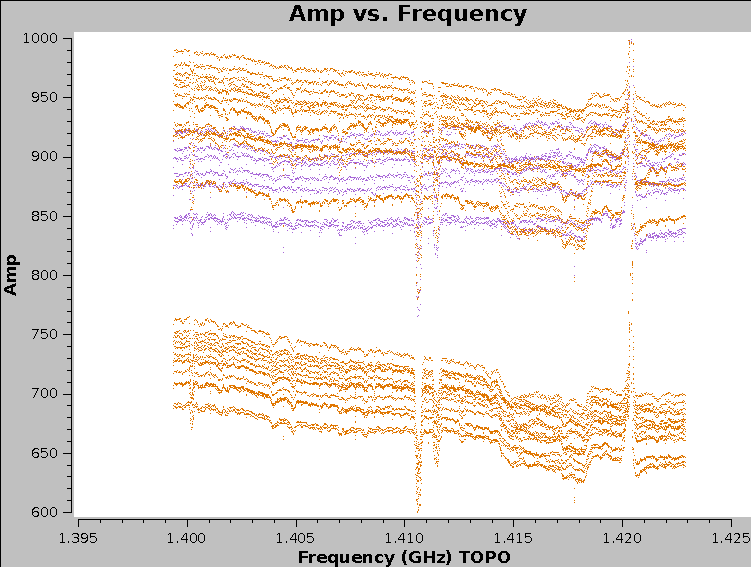

True

Show log 2019-08-22 14:03:07	INFO	plotms::::	
 2019-08-22 14:03:07	INFO	plotms::::+	##########################################
 2019-08-22 14:03:07	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:03:07	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:03:07	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:03:07	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:03:07	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:03:07	INFO	plotms::::+ antenna="*&&&",scan="",correlation="",array="",observation="",
 2019-08-22 14:03:07	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:03:07	INFO	plotms::::+ avgtime="300",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:03:07	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:03:07	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:03:07	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:03:07	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:03:07	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:03:07	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:03:07	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:03:07	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:03:07	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:03:07	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:03:07	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:03:07	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:03:07	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:03:07	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	START Current memory usage: 5742.8 kilobytes.
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ Time: 300 seconds. Scan: false; Field: false
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:03:07	INFO	PlotMS::load_cache	Data selection will yield a total of 75600 plottable points (flagged and unflagged).
 2019-08-22 14:03:07	INFO	PlotMS::load_cache+	The plotms cache will

In [20]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='300',
       field=targets,
       antenna='*&&&',
       coloraxis='corr')

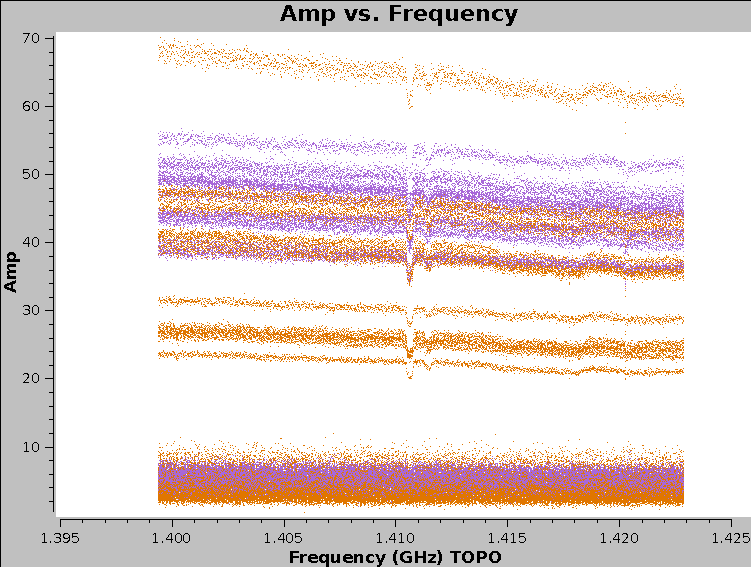

True

Show log 2019-08-22 14:03:14	INFO	plotms::::	
 2019-08-22 14:03:14	INFO	plotms::::+	##########################################
 2019-08-22 14:03:14	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:03:14	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:03:14	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:03:14	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:03:14	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:03:14	INFO	plotms::::+ antenna="*&",scan="",correlation="",array="",observation="",
 2019-08-22 14:03:14	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:03:14	INFO	plotms::::+ avgtime="300",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:03:14	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:03:14	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:03:14	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:03:14	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:03:14	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:03:14	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:03:14	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:03:14	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:03:14	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:03:14	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:03:14	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:03:14	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:03:14	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:03:14	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	START Current memory usage: 5756.84 kilobytes.
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ Time: 300 seconds. Scan: false; Field: false
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:03:14	INFO	PlotMS::load_cache	Data selection will yield a total of 189000 plottable points (flagged and unflagged).
 2019-08-22 14:03:14	INFO	PlotMS::load_cache+	The plotms cache will

In [21]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='amp',
       averagedata=True,
       avgtime='300',
       field=targets,
       antenna='*&',
       coloraxis='corr')

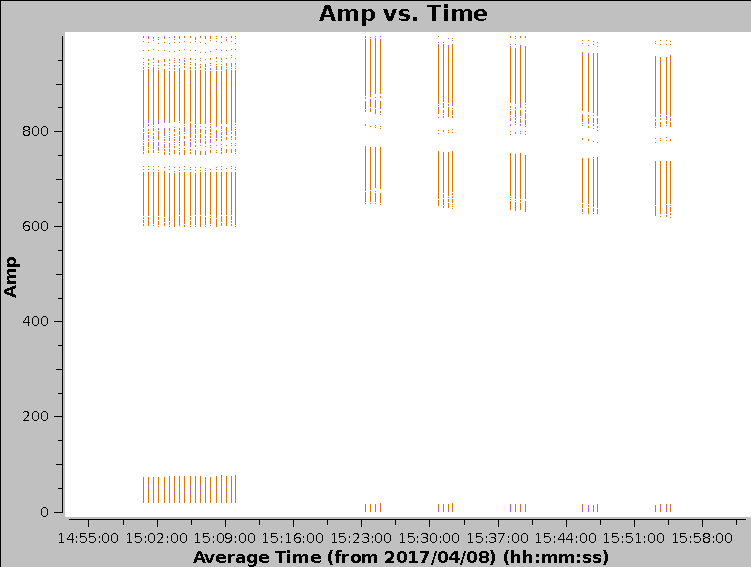

True

Show log 2019-08-22 14:04:44	INFO	plotms::::	
 2019-08-22 14:04:44	INFO	plotms::::+	##########################################
 2019-08-22 14:04:44	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:04:44	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:04:44	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:04:44	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:04:44	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:04:44	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:04:44	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:04:44	INFO	plotms::::+ avgtime="30",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:04:44	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:04:44	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:04:44	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:04:44	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:04:44	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:04:44	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:04:44	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:04:44	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:04:44	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:04:44	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:04:44	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:04:44	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:04:44	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:04:44	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	START Current memory usage: 5820.22 kilobytes.
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ Time: 30 seconds. Scan: false; Field: false
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:04:44	INFO	PlotMS::load_cache	Data selection will yield a total of 1474200 plottable points (flagged and unflagged).
 2019-08-22 14:04:44	INFO	PlotMS::load_cache+	The plotms cache will require

In [26]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='amp',
       averagedata=True,
       avgtime='30',
       field=targets,
       coloraxis='corr')

### Antenna specific

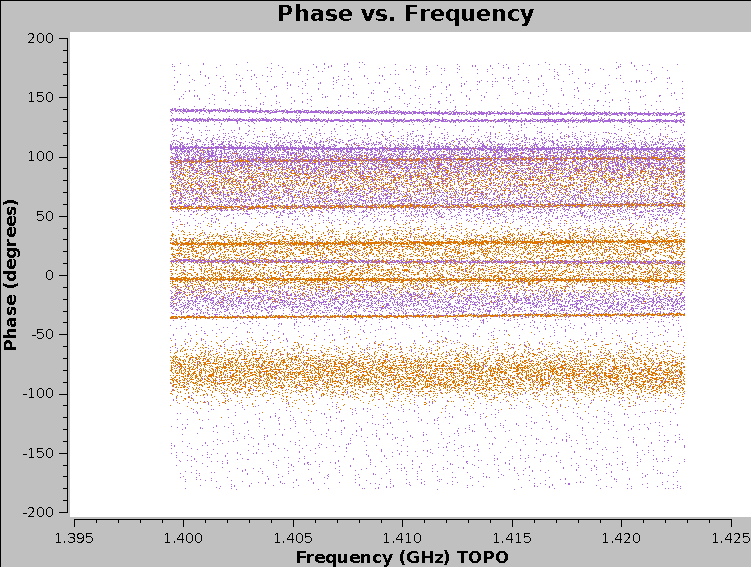

True

Show log 2019-08-22 14:07:32	INFO	plotms::::	
 2019-08-22 14:07:32	INFO	plotms::::+	##########################################
 2019-08-22 14:07:32	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:07:32	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:07:32	INFO	plotms::::+ plotindex=0,xaxis="freq",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:07:32	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:07:32	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:07:32	INFO	plotms::::+ antenna="m003",scan="",correlation="XX,YY",array="",observation="",
 2019-08-22 14:07:32	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:07:32	INFO	plotms::::+ avgtime="300",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:07:32	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:07:32	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:07:32	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:07:32	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:07:32	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:07:32	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:07:32	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:07:32	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:07:32	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:07:32	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:07:32	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:07:32	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:07:32	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:07:32	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	START Current memory usage: 5873.91 kilobytes.
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ Time: 300 seconds. Scan: false; Field: false
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Frequency(6)...
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:07:32	INFO	PlotMS::load_cache	Data selection will yield a total of 63000 plottable points (flagged and unflagged).
 2019-08-22 14:07:32	INFO	PlotMS::load_cache+	The plotms 

In [34]:
plotms(vis=msfile,
       xaxis='freq',
       yaxis='phase',
       averagedata=True,
       avgtime='300',
       correlation='XX,YY',
       field=targets,
       antenna='m003',
       coloraxis='corr')

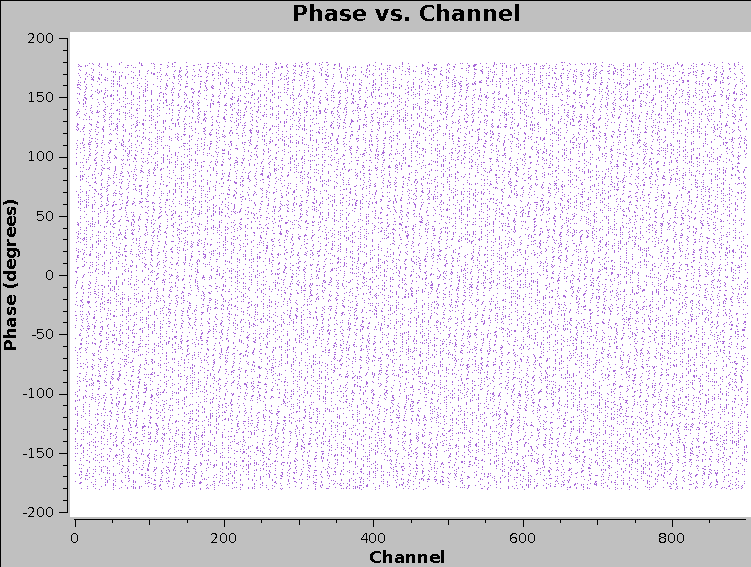

True

Show log 2019-08-22 14:08:27	INFO	plotms::::	
 2019-08-22 14:08:27	INFO	plotms::::+	##########################################
 2019-08-22 14:08:27	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:08:27	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:08:27	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:08:27	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:08:27	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:08:27	INFO	plotms::::+ antenna="m022",scan="",correlation="XX",array="",observation="",
 2019-08-22 14:08:27	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:08:27	INFO	plotms::::+ avgtime="300",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:08:27	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:08:27	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:08:27	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:08:27	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:08:27	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:08:27	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:08:27	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:08:27	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:08:27	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:08:27	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:08:27	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:08:27	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:08:27	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:08:27	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	START Current memory usage: 5884.42 kilobytes.
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ Time: 300 seconds. Scan: false; Field: false
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:08:27	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Channel(5)...
 2019-08-22 14:08:27	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:08:28	INFO	PlotMS::load_cache	Data selection will yield a total of 31500 plottable points (flagged and unflagged).
 2019-08-22 14:08:28	INFO	PlotMS::load_cache+	The plotms ca

In [37]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='300',
       correlation='XX',
       field=targets,
       antenna='m022',
       coloraxis='corr')

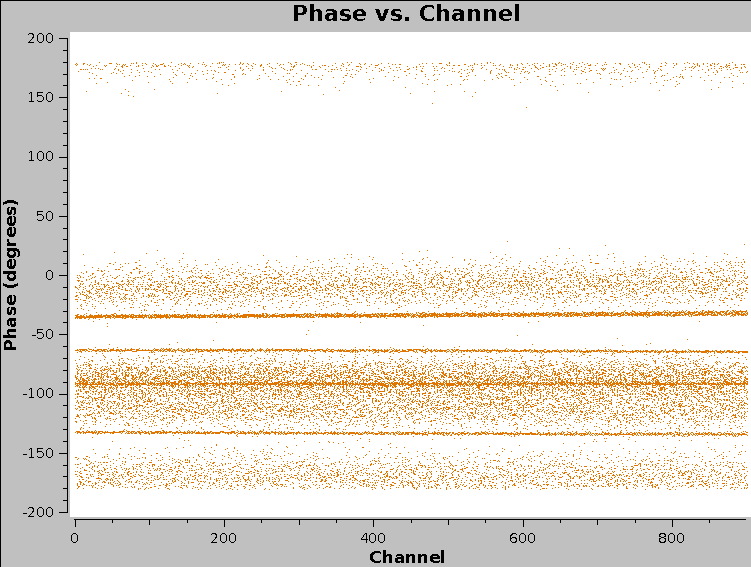

True

Show log 2019-08-22 14:08:36	INFO	plotms::::	
 2019-08-22 14:08:36	INFO	plotms::::+	##########################################
 2019-08-22 14:08:36	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:08:36	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:08:36	INFO	plotms::::+ plotindex=0,xaxis="channel",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:08:36	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:08:36	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:08:36	INFO	plotms::::+ antenna="m022",scan="",correlation="YY",array="",observation="",
 2019-08-22 14:08:36	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:08:36	INFO	plotms::::+ avgtime="300",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:08:36	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:08:36	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:08:36	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:08:36	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:08:36	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:08:36	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:08:36	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:08:36	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:08:36	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:08:36	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:08:36	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:08:36	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:08:36	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:08:36	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	START Current memory usage: 5892.88 kilobytes.
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ Time: 300 seconds. Scan: false; Field: false
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Channel(5)...
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:08:36	INFO	PlotMS::load_cache	Data selection will yield a total of 31500 plottable points (flagged and unflagged).
 2019-08-22 14:08:36	INFO	PlotMS::load_cache+	The plotms ca

In [38]:
plotms(vis=msfile,
       xaxis='channel',
       yaxis='phase',
       averagedata=True,
       avgtime='300',
       correlation='YY',
       field=targets,
       antenna='m022',
       coloraxis='corr')

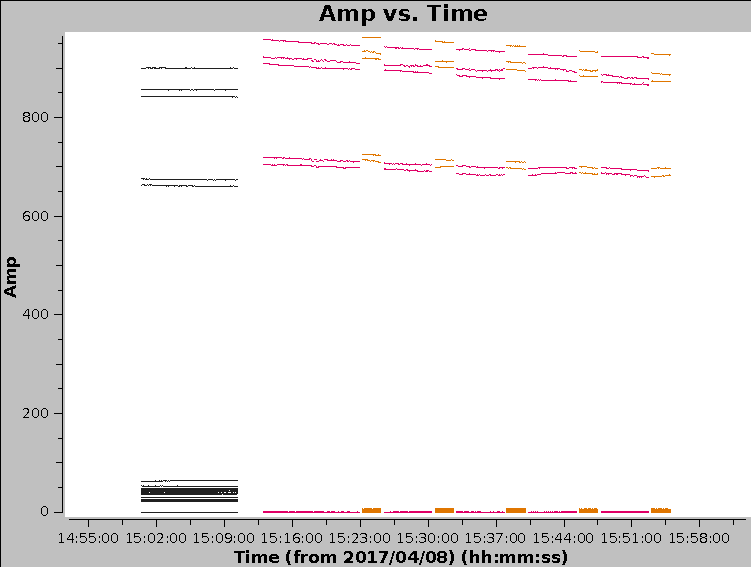

True

Show log 2019-08-22 14:10:05	INFO	plotms::::	
 2019-08-22 14:10:05	INFO	plotms::::+	##########################################
 2019-08-22 14:10:05	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:10:05	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:10:05	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:10:05	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:10:05	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2019-08-22 14:10:05	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:10:05	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="4096",
 2019-08-22 14:10:05	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:10:05	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:10:05	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:10:05	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:10:05	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:10:05	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:10:05	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:10:05	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:10:05	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:10:05	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:10:05	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:10:05	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:10:05	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:10:05	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:10:05	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	START Current memory usage: 5906.56 kilobytes.
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ Channel: 4096 channels
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:10:05	INFO	PlotMS::load_cache	Data selection will yield a total of 31374 plottable points (flagged and unflagged).
 2019-08-22 14:10:05	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.000412344 GB of memo

In [39]:
plotms(vis=msfile, xaxis='time', yaxis='amp', averagedata=True, avgchannel='4096', coloraxis='field')

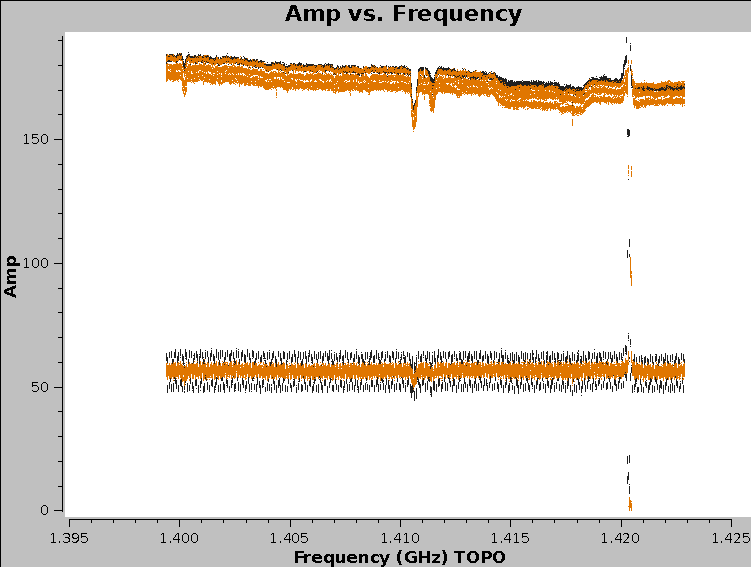

True

Show log 2019-08-22 14:10:11	INFO	plotms::::	
 2019-08-22 14:10:11	INFO	plotms::::+	##########################################
 2019-08-22 14:10:11	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:10:11	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:10:11	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:10:11	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:10:11	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:10:11	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-08-22 14:10:11	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:10:11	INFO	plotms::::+ avgtime="10",avgscan=True,avgfield=False,avgbaseline=True,avgantenna=False,
 2019-08-22 14:10:11	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:10:11	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:10:11	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:10:11	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:10:11	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:10:11	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:10:11	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:10:11	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:10:11	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:10:11	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:10:11	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:10:11	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:10:11	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:10:11	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	START Current memory usage: 8223.17 kilobytes.
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ Time: 10 seconds. Scan: true; Field: false
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ All Baselines: true
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:10:11	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-08-22 14:10:11	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:10:12	INFO	PlotMS::load_cache	Data selection will yield a total of 3666600 plottable points (flagged and unflagge

In [40]:
plotms(vis=msfile,
       xaxis='frequency',
       yaxis='amp',
       correlation='XX,YY',
       field=targets,
       averagedata=True,
       avgscan=True,
       avgtime='10',
       avgbaseline=True,
       coloraxis='field')

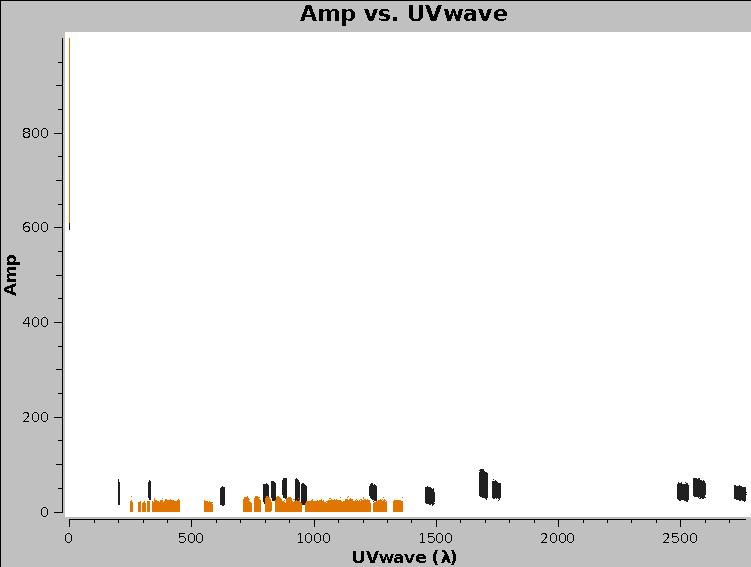

True

Show log 2019-08-22 14:10:28	INFO	plotms::::	
 2019-08-22 14:10:28	INFO	plotms::::+	##########################################
 2019-08-22 14:10:28	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:10:28	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:10:28	INFO	plotms::::+ plotindex=0,xaxis="uvwave",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:10:28	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:10:28	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:10:28	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:10:28	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:10:28	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:10:28	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:10:28	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:10:28	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:10:28	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:10:28	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:10:28	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:10:28	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:10:28	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:10:28	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:10:28	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:10:28	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:10:28	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:10:28	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:10:28	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	START Current memory usage: 12221.3 kilobytes.
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. UVwave(29)...
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:10:28	INFO	PlotMS::load_cache	Data selection will yield a total of 11226600 plottable points (flagged and unflagged).
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.115559 GB of memory (10.2933 bytes/point).
 2019-08-22 14:10:28	INFO	PlotMS::load_cache+	This is 0.708384% of the memory avail. to CAS

In [41]:
plotms(vis=msfile, xaxis='uvwave', yaxis='amp', field=targets, coloraxis='field')

There may be a few bad points, RFI or system related issues that will affect the calibration and data analysis. It is generally a good idea to spend a little time simply looking at your data before doing anything.

Look for bad antennas, persistently bad channels across all spectral windows, and other clear outliers.  

## Flagging the Data

Once bad data has been identified, it must be flagged out to improve imaging:
* for calibrator sources -- bad data for the calibrator sources should ideally be removed before determining the calibration solutions
* for other sources -- generally easier to identify bad data after the calibration is applied.

If possible flag either all visibilities for some time interval, or all by antenna, rather than flagging individual baselines.
RFI are channel specific and may not appear in all datasets, these channels has to be flagged on a per baseline basis.

If you flag data from calibrator sources associated with the solution for a target source, remove the data from the target sources as well, since the data section cannot be calibrated.

In [42]:
flagdata(vis=msfile, mode='manual', antenna='m022');

Show log 2019-08-22 14:11:11	INFO	flagdata::::	
 2019-08-22 14:11:11	INFO	flagdata::::+	##########################################
 2019-08-22 14:11:11	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-08-22 14:11:11	INFO	flagdata::::	flagdata(vis="ngc3621.ms",mode="manual",autocorr=False,inpfile="",reason="any",
 2019-08-22 14:11:11	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="m022",uvrange="",
 2019-08-22 14:11:11	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-08-22 14:11:11	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-08-22 14:11:11	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-08-22 14:11:11	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-08-22 14:11:11	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-08-22 14:11:11	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-08-22 14:11:11	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-08-22 14:11:11	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-08-22 14:11:11	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-08-22 14:11:11	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-08-22 14:11:11	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-08-22 14:11:11	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-08-22 14:11:11	INFO	flagdata::::+ flagbackup=True,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-08-22 14:11:11	INFO	flagdata::::+ writeflags=True)
 2019-08-22 14:11:11	INFO	flagdata::::	Backup original flags before applying new flags
 2019-08-22 14:11:11	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:11:11	INFO	FlagVersion::saveFlagVersion	Creating new backup flag file called flagdata_4
 2019-08-22 14:11:11	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:11:11	INFO	flagdata::::	Manual mode is active
 2019-08-22 14:11:11	INFO	flagdata::::	Initializing the agents
 2019-08-22 14:11:11	INFO	Manual::setAgentParameters autocorr is 0
 2019-08-22 14:11:11	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-08-22 14:11:11	INFO	flagdata::::	Running the agentflagger tool
 2019-08-22 14:11:11	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:11	INFO	FlagMSHandler::	Chunk = 1 [progress: 19%], Observation = 0, Array = 0, Scan = 1, Field = 0 (0408-65), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 745
 2019-08-22 14:11:11	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:11	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:11	INFO	FlagMSHandler::	Chunk = 2 [progress: 40%], Observation = 0, Array = 0, Scan = 2, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 750
 2019-08-22 14:11:11	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:11	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:11	INFO	FlagMSHandler::	Chunk = 3 [progress: 43%], Observation = 0, Array = 0, Scan = 3, Field = 2 (1117-248), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 145
 2019-08-22 14:11:11	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:11	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:11	INFO	FlagMSHandler::	Chunk = 4

In [43]:
#flagdata(vis=msfile, uvrange='0~10lambda', flagbackup=False);
flagdata(vis=msfile, uvrange='0lambda', flagbackup=False);

Show log 2019-08-22 14:11:16	INFO	flagdata::::	
 2019-08-22 14:11:16	INFO	flagdata::::+	##########################################
 2019-08-22 14:11:16	INFO	flagdata::::+	##### Begin Task: flagdata #####
 2019-08-22 14:11:16	INFO	flagdata::::	flagdata(vis="ngc3621.ms",mode="manual",autocorr=False,inpfile="",reason="any",
 2019-08-22 14:11:16	INFO	flagdata::::+ tbuff=0.0,spw="",field="",antenna="",uvrange="0lambda",
 2019-08-22 14:11:16	INFO	flagdata::::+ timerange="",correlation="",scan="",intent="",array="",
 2019-08-22 14:11:16	INFO	flagdata::::+ observation="",feed="",clipminmax=[],datacolumn="DATA",clipoutside=True,
 2019-08-22 14:11:16	INFO	flagdata::::+ channelavg=False,chanbin=1,timeavg=False,timebin="0s",clipzeros=False,
 2019-08-22 14:11:16	INFO	flagdata::::+ quackinterval=1.0,quackmode="beg",quackincrement=False,tolerance=0.0,addantenna="",
 2019-08-22 14:11:16	INFO	flagdata::::+ lowerlimit=0.0,upperlimit=90.0,ntime="scan",combinescans=False,timecutoff=4.0,
 2019-08-22 14:11:16	INFO	flagdata::::+ freqcutoff=3.0,timefit="line",freqfit="poly",maxnpieces=7,flagdimension="freqtime",
 2019-08-22 14:11:16	INFO	flagdata::::+ usewindowstats="none",halfwin=1,extendflags=True,winsize=3,timedev="",
 2019-08-22 14:11:16	INFO	flagdata::::+ freqdev="",timedevscale=5.0,freqdevscale=5.0,spectralmax=1000000.0,spectralmin=0.0,
 2019-08-22 14:11:16	INFO	flagdata::::+ antint_ref_antenna="",minchanfrac=0.6,verbose=False,extendpols=True,growtime=50.0,
 2019-08-22 14:11:16	INFO	flagdata::::+ growfreq=50.0,growaround=False,flagneartime=False,flagnearfreq=False,minrel=0.0,
 2019-08-22 14:11:16	INFO	flagdata::::+ maxrel=1.0,minabs=0,maxabs=-1,spwchan=False,spwcorr=False,
 2019-08-22 14:11:16	INFO	flagdata::::+ basecnt=False,fieldcnt=False,name="Summary",action="apply",display="",
 2019-08-22 14:11:16	INFO	flagdata::::+ flagbackup=False,savepars=False,cmdreason="",outfile="",overwrite=True,
 2019-08-22 14:11:16	INFO	flagdata::::+ writeflags=True)
 2019-08-22 14:11:16	INFO	AgentFlagger::open	Table type is Measurement Set
 2019-08-22 14:11:16	INFO	flagdata::::	Manual mode is active
 2019-08-22 14:11:16	INFO	flagdata::::	Initializing the agents
 2019-08-22 14:11:16	INFO	Manual::setAgentParameters autocorr is 0
 2019-08-22 14:11:16	INFO	AgentFlagger::initAgents	There are 1 valid agents in list
 2019-08-22 14:11:16	INFO	flagdata::::	Running the agentflagger tool
 2019-08-22 14:11:16	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:16	INFO	FlagMSHandler::	Chunk = 1 [progress: 19%], Observation = 0, Array = 0, Scan = 1, Field = 0 (0408-65), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 894
 2019-08-22 14:11:16	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:16	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:16	INFO	FlagMSHandler::	Chunk = 2 [progress: 40%], Observation = 0, Array = 0, Scan = 2, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 900
 2019-08-22 14:11:16	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:16	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:16	INFO	FlagMSHandler::	Chunk = 3 [progress: 43%], Observation = 0, Array = 0, Scan = 3, Field = 2 (1117-248), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 174
 2019-08-22 14:11:16	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:16	INFO	FlagMSHandler::	------------------------------------------------------------------------------------ 
 2019-08-22 14:11:16	INFO	FlagMSHandler::	Chunk = 4 [progress: 53%], Observation = 0, Array = 0, Scan = 4, Field = 1 (NGC3621), Spw = 0, Channels = 900, Corrs = [ XX YY ], Total Rows = 450
 2019-08-22 14:11:16	INFO	Manual::chunkSummary	=> Data flagged so far 100%
 2019-08-22 14:11:16	INFO	FlagMSHandler::	------

## Inspection after flagging

Viewing amplitude vs channel will show the passband for each target very clearly.

```
plotms(vis=msfile, xaxis='time', yaxis='amp', averagedata=T, avgchannel='4096', coloraxis='field', iteraxis='spw')
```

`avgchannel`: Number of channels to average over, by choosing a value $\geq$ number of channels, data will be averaged over all channels

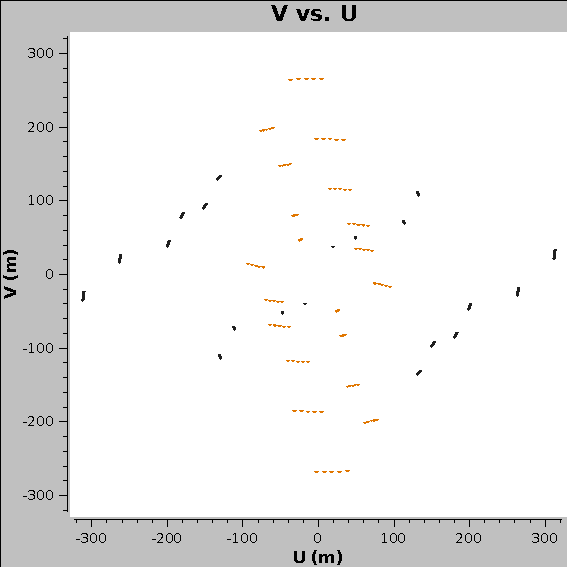

True

Show log 2019-08-22 14:11:24	INFO	plotms::::	
 2019-08-22 14:11:24	INFO	plotms::::+	##########################################
 2019-08-22 14:11:24	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:11:24	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:11:24	INFO	plotms::::+ plotindex=0,xaxis="u",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:11:24	INFO	plotms::::+ yaxis="v",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:11:24	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="0",timerange="",uvrange="",
 2019-08-22 14:11:24	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:11:24	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:11:24	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:11:24	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:11:24	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:11:24	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:11:24	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:11:24	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:11:24	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:11:24	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:11:24	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:11:24	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:11:24	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:11:24	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:11:24	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:11:24	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:11:24	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	START Current memory usage: 12264.8 kilobytes.
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Caching for the new plot: V(31) vs. U(30)...
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:11:24	INFO	PlotMS::load_cache	Data selection will yield a total of 11226600 plottable points (flagged and unflagged).
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.0258461 GB of memory (2.30222 bytes/point).
 2019-08-22 14:11:24	INFO	PlotMS::load_cache+	This is 0.158438% of the memory avail. to CASA (16.3131 GB).
 

In [44]:
plotms(vis=msfile,
       xaxis='u',
       yaxis='v',
       field='0408-65,1117-248',
       spw='0',
       ydatacolumn='',
       coloraxis='field',
       correlation='')

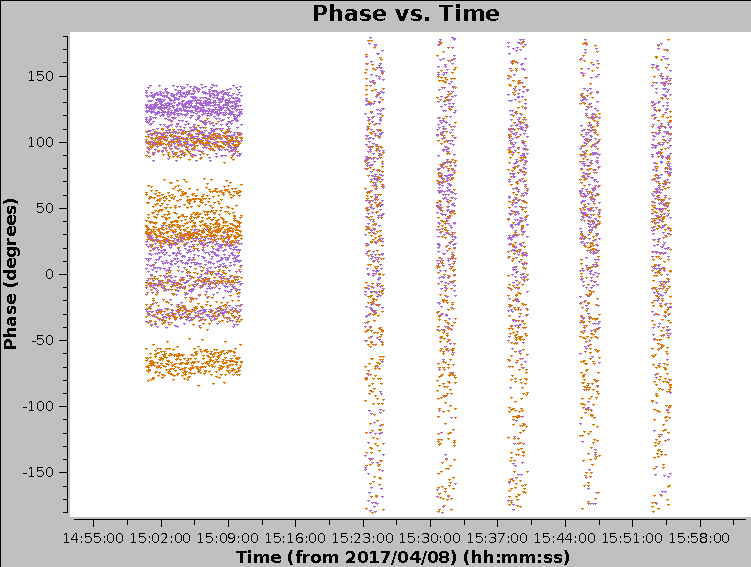

True

Show log 2019-08-22 14:11:30	INFO	plotms::::	
 2019-08-22 14:11:30	INFO	plotms::::+	##########################################
 2019-08-22 14:11:30	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:11:30	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:11:30	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:11:30	INFO	plotms::::+ yaxis="phase",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:11:30	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="*:2550",timerange="",uvrange="",
 2019-08-22 14:11:30	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-08-22 14:11:30	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:11:30	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:11:30	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:11:30	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:11:30	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:11:30	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:11:30	INFO	plotms::::+ symboloutline=False,coloraxis="corr",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:11:30	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:11:30	INFO	plotms::::+ plotrange=[0, 0, -180, 180],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:11:30	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:11:30	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:11:30	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:11:30	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:11:30	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:11:30	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:11:30	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	START Current memory usage: 12274.8 kilobytes.
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:11:30	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	Caching for the new plot: Phase(18):data vs. Time(2)...
 2019-08-22 14:11:30	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:11:31	INFO	PlotMS::load_cache	Data selection will yield a total of 12474 plottable points (flagged and unflagged).
 2019-08-22 14:11:31	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.000163944 GB of memory (13.1429 bytes/point).
 2019-08-22 14:11:31	INFO	PlotMS::load_cache+	This is 0.00100499% o

In [45]:
plotms(vis=msfile,
       xaxis='time',
       yaxis='phase',
       correlation='XX,YY',
       spw='*:2550',
       field=targets,
       coloraxis='corr',
       plotrange=[0,0,-180,180])

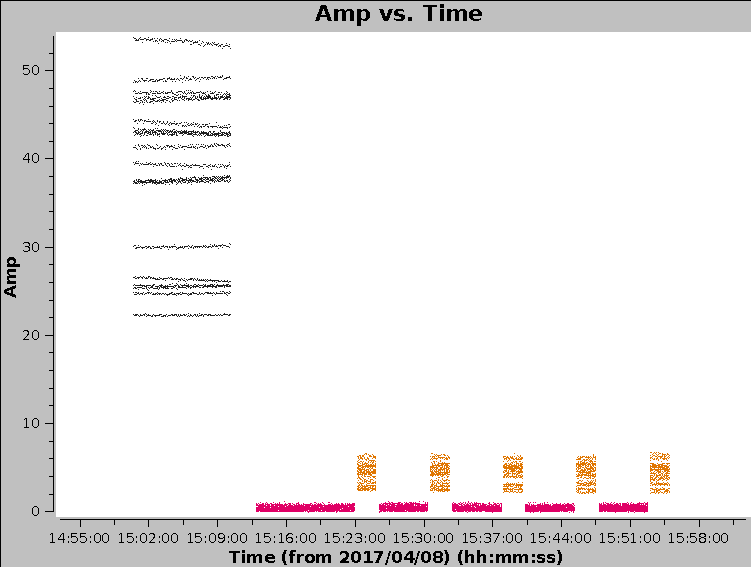

True

Show log 2019-08-22 14:11:39	INFO	plotms::::	
 2019-08-22 14:11:39	INFO	plotms::::+	##########################################
 2019-08-22 14:11:39	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:11:39	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:11:39	INFO	plotms::::+ plotindex=0,xaxis="time",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:11:39	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:11:39	INFO	plotms::::+ selectdata=True,field="",spw="",timerange="",uvrange="",
 2019-08-22 14:11:39	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:11:39	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="4096",
 2019-08-22 14:11:39	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:11:39	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:11:39	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:11:39	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:11:39	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:11:39	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:11:39	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:11:39	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:11:39	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:11:39	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:11:39	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:11:39	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:11:39	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:11:39	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:11:39	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	START Current memory usage: 12286.8 kilobytes.
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ Channel: 4096 channels
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:11:39	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Time(2)...
 2019-08-22 14:11:39	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:11:40	INFO	PlotMS::load_cache	Data selection will yield a total of 31374 plottable points (flagged and unflagged).
 2019-08-22 14:11:40	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.000412344 GB of memo

In [46]:
plotms(vis=msfile, xaxis='time', yaxis='amp', averagedata=True, avgchannel='4096', coloraxis='field')

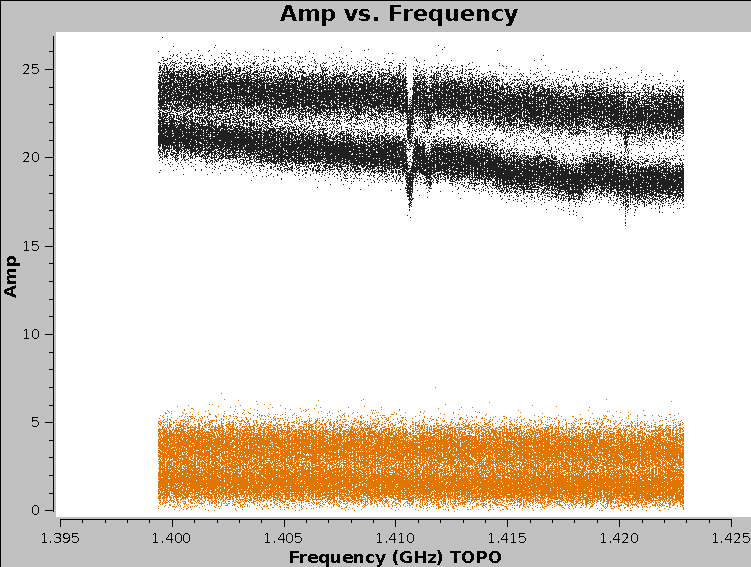

True

Show log 2019-08-22 14:11:49	INFO	plotms::::	
 2019-08-22 14:11:49	INFO	plotms::::+	##########################################
 2019-08-22 14:11:49	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:11:49	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:11:49	INFO	plotms::::+ plotindex=0,xaxis="frequency",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:11:49	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:11:49	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:11:49	INFO	plotms::::+ antenna="",scan="",correlation="XX,YY",array="",observation="",
 2019-08-22 14:11:49	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:11:49	INFO	plotms::::+ avgtime="10",avgscan=True,avgfield=False,avgbaseline=True,avgantenna=False,
 2019-08-22 14:11:49	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:11:49	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:11:49	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:11:49	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:11:49	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:11:49	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:11:49	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:11:49	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:11:49	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:11:49	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:11:49	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:11:49	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:11:49	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:11:49	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	START Current memory usage: 12295.6 kilobytes.
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ Time: 10 seconds. Scan: true; Field: false
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ All Baselines: true
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:11:49	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. Frequency(6)...
 2019-08-22 14:11:49	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:11:50	INFO	PlotMS::load_cache	Data selection will yield a total of 3666600 plottable points (flagged and unflagge

In [47]:
plotms(vis=msfile,
       xaxis='frequency',
       yaxis='amp',
       correlation='XX,YY',
       field=targets,
       averagedata=True,
       avgscan=True,
       avgtime='10',
       avgbaseline=True,
       coloraxis='field')

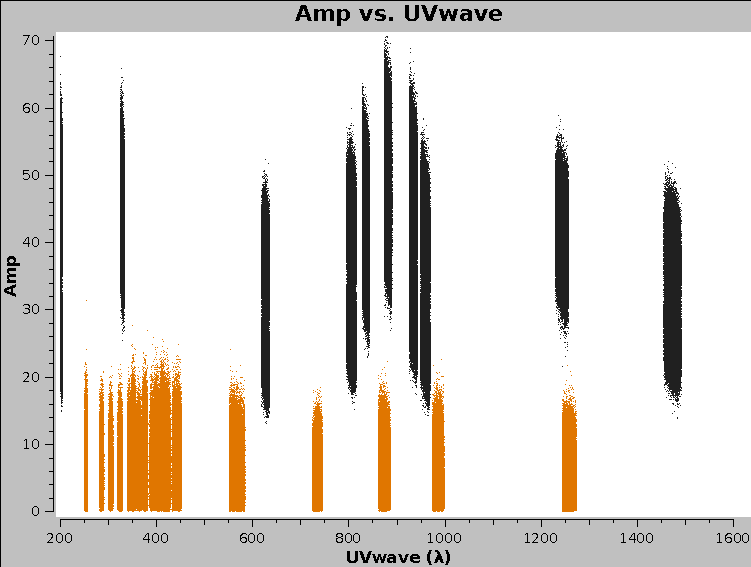

True

Show log 2019-08-22 14:12:12	INFO	plotms::::	
 2019-08-22 14:12:12	INFO	plotms::::+	##########################################
 2019-08-22 14:12:12	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:12:12	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:12:12	INFO	plotms::::+ plotindex=0,xaxis="uvwave",xdatacolumn="",xframe="",xinterp="",
 2019-08-22 14:12:12	INFO	plotms::::+ yaxis="amp",ydatacolumn="",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:12:12	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="",timerange="",uvrange="",
 2019-08-22 14:12:12	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:12:12	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="",
 2019-08-22 14:12:12	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:12:12	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:12:12	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:12:12	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:12:12	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:12:12	INFO	plotms::::+ symboloutline=False,coloraxis="field",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:12:12	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:12:12	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:12:12	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:12:12	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:12:12	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:12:12	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:12:12	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:12:12	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:12:12	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	START Current memory usage: 16298 kilobytes.
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Data Averaging: None.
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Caching for the new plot: Amp(17):data vs. UVwave(29)...
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:12:12	INFO	PlotMS::load_cache	Data selection will yield a total of 11226600 plottable points (flagged and unflagged).
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+	The plotms cache will require an estimated 0.115559 GB of memory (10.2933 bytes/point).
 2019-08-22 14:12:12	INFO	PlotMS::load_cache+	This is 0.708384% of the memory avail. to CASA 

In [48]:
plotms(vis=msfile, xaxis='uvwave', yaxis='amp', field=targets, coloraxis='field')

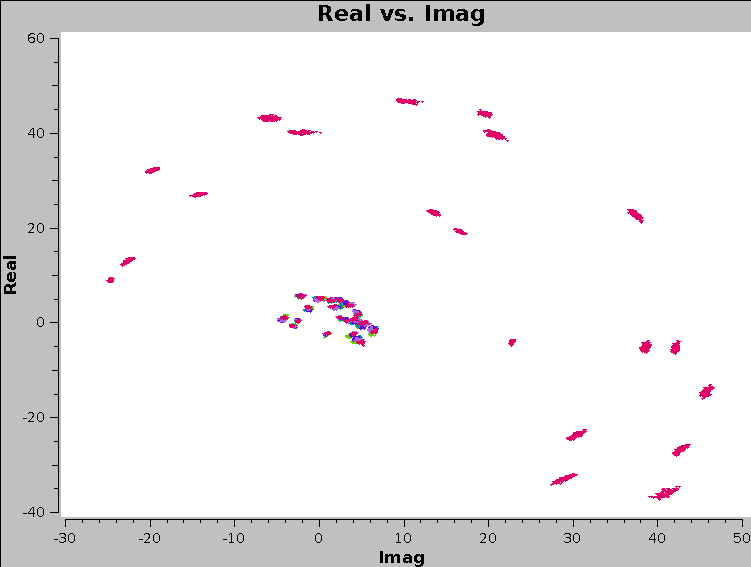

True

Show log 2019-08-22 14:12:35	INFO	plotms::::	
 2019-08-22 14:12:35	INFO	plotms::::+	##########################################
 2019-08-22 14:12:35	INFO	plotms::::+	##### Begin Task: plotms #####
 2019-08-22 14:12:35	INFO	plotms::::	plotms(vis="ngc3621.ms",gridrows=1,gridcols=1,rowindex=0,colindex=0,
 2019-08-22 14:12:35	INFO	plotms::::+ plotindex=0,xaxis="imag",xdatacolumn="data",xframe="",xinterp="",
 2019-08-22 14:12:35	INFO	plotms::::+ yaxis="real",ydatacolumn="data",yframe="",yinterp="",yaxislocation="",
 2019-08-22 14:12:35	INFO	plotms::::+ selectdata=True,field="0408-65,1117-248",spw="0",timerange="",uvrange="",
 2019-08-22 14:12:35	INFO	plotms::::+ antenna="",scan="",correlation="",array="",observation="",
 2019-08-22 14:12:35	INFO	plotms::::+ intent="",feed="",msselect="",averagedata=True,avgchannel="512",
 2019-08-22 14:12:35	INFO	plotms::::+ avgtime="",avgscan=False,avgfield=False,avgbaseline=False,avgantenna=False,
 2019-08-22 14:12:35	INFO	plotms::::+ avgspw=False,scalar=False,transform=True,freqframe="",restfreq="",
 2019-08-22 14:12:35	INFO	plotms::::+ veldef="RADIO",shift=[0.0, 0.0],extendflag=False,extcorr=False,extchannel=False,
 2019-08-22 14:12:35	INFO	plotms::::+ iteraxis="",xselfscale=False,yselfscale=False,xsharedaxis=False,ysharedaxis=False,
 2019-08-22 14:12:35	INFO	plotms::::+ customsymbol=False,symbolshape="autoscaling",symbolsize=2,symbolcolor="0000ff",symbolfill="fill",
 2019-08-22 14:12:35	INFO	plotms::::+ symboloutline=False,coloraxis="scan",customflaggedsymbol=False,flaggedsymbolshape="circle",flaggedsymbolsize=2,
 2019-08-22 14:12:35	INFO	plotms::::+ flaggedsymbolcolor="ff0000",flaggedsymbolfill="fill",flaggedsymboloutline=False,xconnector="",timeconnector=False,
 2019-08-22 14:12:35	INFO	plotms::::+ plotrange=[],title="",titlefont=0,xlabel="",xaxisfont=0,
 2019-08-22 14:12:35	INFO	plotms::::+ ylabel="",yaxisfont=0,showmajorgrid=False,majorwidth=1,majorstyle="",
 2019-08-22 14:12:35	INFO	plotms::::+ majorcolor="B0B0B0",showminorgrid=False,minorwidth=1,minorstyle="",minorcolor="D0D0D0",
 2019-08-22 14:12:35	INFO	plotms::::+ showlegend=False,legendposition="",plotfile="plotms_temp.png",expformat="",verbose=True,
 2019-08-22 14:12:35	INFO	plotms::::+ exprange="",highres=False,dpi=-1,width=-1,height=-1,
 2019-08-22 14:12:35	INFO	plotms::::+ overwrite=True,showgui=False,clearplots=True,callib=[''],headeritems="",
 2019-08-22 14:12:35	INFO	plotms::::+ showatm=False,showtsky=False)
 2019-08-22 14:12:35	INFO	PlotMS::params_changed	Updating: REDRAW, MSDATA, CACHE, AXES, CANVAS, DISPLAY, PAGEHEADER, ITERATION, LOG, PLOTMS_OPTIONS.
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	Clearing the existing plotms cache.
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	START Current memory usage: 16306.9 kilobytes.
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	Plot Data Transformations:
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ Frame = 
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ VelDef = RADIO
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ RestFreq = 0 MHz
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ dX = 0 arcsec
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ dY = 0 arcsec
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ formStokes = false
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	Data Averaging: 
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ Using VECTOR averaging.
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ Channel: 512 channels
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	Plot Data Calibration:
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ Use Calibration = 0
 2019-08-22 14:12:35	INFO	PlotMS::load_cache+ Calibration Library = 
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	Caching for the new plot: Real(19):data vs. Imag(20):data...
 2019-08-22 14:12:35	INFO	PlotMS::load_cache	Loading page header cache
 2019-08-22 14:12:36	INFO	PlotMS::load_cache	Data selection will yield a total of 12474 plottable points (flagged and unflagged).
 2019-08-22 14:12:36	INFO	PlotMS::load_cache+	The plotms cache will require an es

In [49]:
plotms(vis=msfile,
       xaxis='imag',
       yaxis='real',
       field=targets,
       spw='0',
       xdatacolumn='data',
       ydatacolumn='data',
       coloraxis='scan',
       antenna='',
       correlation='',
       avgscan=False,
       avgchannel='512')